<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import math
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
# Load your dataset here
df = pd.read_csv('nyc-rolling-sales.csv')

print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(84548, 22)

In [6]:
#statistik deskriptif
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [7]:
# iterating the columns 
for col in df.columns: 
    print(col) 

Unnamed: 0
BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
SALE PRICE
SALE DATE


In [8]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)
df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [10]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [11]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [12]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [13]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [14]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [15]:
#  Check for duplicates before

print("The dataframe has "+ str(sum(df.duplicated())) +" duplicated rows (exluding the original rows)")

#df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

The dataframe has 765 duplicated rows (exluding the original rows)


The dataframe has 765 duplicated rows (exluding the original rows).

In [16]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [17]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [18]:
# Write your function below
df[df['RESIDENTIAL UNITS']==0].describe()
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Write your findings below:

Type Markdown and LaTeX:  𝛼2

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [19]:
# Write your syntax below
df['BOROUGH'].value_counts()

#df_borough = df.groupby(['BOROUGH'])['BOROUGH'].count()
#df_borough


4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

In [20]:
df['BOROUGH']=df['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
df = df.dropna()
print (df.isna().sum())
df.head()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [21]:
# Write your function below
#df['BOROUGH'].mean()
# Graded-Funtion Begin (~1 Lines)
#df1 = df
#df1['BOROUGH1']=df1['BOROUGH']
#df1['BOROUGH1']=df1['BOROUGH1'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
mean_data = df.groupby(['BOROUGH']).mean()
display(mean_data)
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,4202.934372,298.625679,10360.980841,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
Brooklyn,4317.583484,339.525228,11072.688210,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
Manhattan,1322.729516,65.578480,9980.080948,19.265548,2.144126,21.401777,5844.203356,34013.893386,1847.187562,1.910402e+07
Queens,8034.016915,54.752657,11313.902852,2.131863,0.366011,2.497166,4006.229543,2992.086167,1905.432253,9.357566e+05
Staten Island,3372.890040,80.998494,10092.578987,1.313124,0.094333,1.406326,8534.151949,4762.127283,1908.958953,5.752012e+05


From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [22]:
# Write your function below
med_data = df.groupby(['BOROUGH']).median()
display(med_data)
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,4177.5,47.0,10465.0,1.0,0.0,1.0,2375.0,1764.0,1932.0,274897.0
Brooklyn,4558.0,50.0,11219.0,1.0,0.0,1.0,1800.0,1520.0,1930.0,425605.0
Manhattan,1415.0,35.0,10025.0,4.0,0.0,6.0,2496.0,7328.0,1910.0,6500000.0
Queens,8850.0,36.0,11412.0,1.0,0.0,1.0,2784.5,1632.0,1931.0,630000.0
Staten Island,3234.0,49.0,10308.0,1.0,0.0,1.0,3420.0,1584.0,1970.0,484000.0


From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [23]:
# Write your function below
#df['BOROUGH'].mode()
#df1.mode()['BOROUGH1'][0]


#mode_data = df.groupby(['BOROUGH'])['TOTAL UNITS','SALE PRICE', 'LAND SQUARE FEET'].agg(pd.Series.mode)
mode_data =df.groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
display(mode_data)
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Bronx,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.0,0.0,0,1,D4,0.0,2017-06-29
1,Brooklyn,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.0,0.0,0,1,R4,0.0,2016-10-06
2,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2,1009,37,C7,102 WEST 57TH STREET,,10029,0,0,1,7532.0,112850.0,1910,2,C7,10.0,2016-12-16
3,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,12202,1,A1,30-80 42ND STREET,,11434,1,0,1,4000.0,1224.0,1920,1,A1,10.0,2016-10-28
4,Staten Island,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2873,1,A5,SERENA COURT,,10314,1,0,1,4000.0,1200.0,1970,1,A5,10.0,2016-12-05


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [24]:
print(df['COMMERCIAL UNITS'].isnull().sum())

0


In [25]:
# Write your function below
range_price = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
display(range_price)
range_price1=df.groupby('BOROUGH').agg(np.ptp)
display(range_price1)
# Graded-Funtion Begin (~1 Lines)
# Graded-Funtion End

BOROUGH
Bronx            1.100000e+08
Brooklyn         3.450000e+08
Manhattan        2.210000e+09
Queens           2.575000e+08
Staten Island    1.220000e+08
dtype: float64

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,
Bronx,3692,5360,10803,948,22,955,679000.0,1303935.0,2017,1.100000e+08,364 days
Brooklyn,8954,9008,11249,889,184,889,970000.0,1330743.0,2017,3.450000e+08,364 days
Manhattan,2243,9055,10463,894,318,902,188641.0,1616884.0,2016,2.210000e+09,364 days
Queens,16306,2686,11694,1844,2261,2261,4228267.0,3750532.0,2017,2.575000e+08,364 days
Staten Island,8044,849,10314,143,126,143,4252147.0,4252147.0,2016,1.220000e+08,363 days


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [26]:
# Write your function below
var_price = df.groupby(['BOROUGH']).var()
display(var_price)
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,1.116755e+06,574149.535826,1.069825e+06,498.684024,0.771532,514.454709,3.375209e+08,8.683572e+08,340594.440137,7.803693e+12
Brooklyn,7.335413e+06,285379.149550,1.636403e+06,72.958719,2.704118,75.818955,7.882877e+07,2.210455e+08,313687.756141,1.561761e+13
Manhattan,3.529198e+05,95755.246058,4.961811e+05,4384.278229,185.858654,4557.076558,1.978825e+08,1.172796e+10,134560.393640,7.688348e+15
Queens,1.910290e+07,9940.452411,9.356891e+05,366.283292,472.879663,845.665123,1.613805e+09,1.366620e+09,66019.471718,1.668231e+13
Staten Island,5.644044e+06,9176.199621,2.174749e+06,7.951841,6.088087,13.871403,1.010440e+10,6.221009e+09,114973.878164,4.069231e+12


From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [27]:
# Write your function below
#std_python = (df1.groupby(['BOROUGH1'])['SALE PRICE'].var()) ** 0.5
std_python = df.groupby(['BOROUGH'])['SALE PRICE'].agg(np.std)
# Graded-Funtion Begin (~1 Lines)
print(std_python)
std_python1 = df.groupby(['BOROUGH']).agg(np.std)
# Graded-Funtion Begin (~1 Lines)
display(std_python1)

# Graded-Funtion End

BOROUGH
Bronx            2.793509e+06
Brooklyn         3.951912e+06
Manhattan        8.768322e+07
Queens           4.084398e+06
Staten Island    2.017233e+06
Name: SALE PRICE, dtype: float64


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,1056.766385,757.726557,1034.323430,22.331234,0.878369,22.681594,18371.742462,29467.900592,583.604695,2.793509e+06
Brooklyn,2708.396811,534.208901,1279.219844,8.541588,1.644420,8.707408,8878.556905,14867.597573,560.078348,3.951912e+06
Manhattan,594.070500,309.443446,704.401252,66.213882,13.632999,67.506122,14067.070121,108295.698691,366.824745,8.768322e+07
Queens,4370.685992,99.701817,967.310234,19.138529,21.745796,29.080322,40172.188114,36967.822082,256.942546,4.084398e+06
Staten Island,2375.719773,95.792482,1474.702931,2.819901,2.467405,3.724433,100520.657952,78873.373093,339.077982,2.017233e+06


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

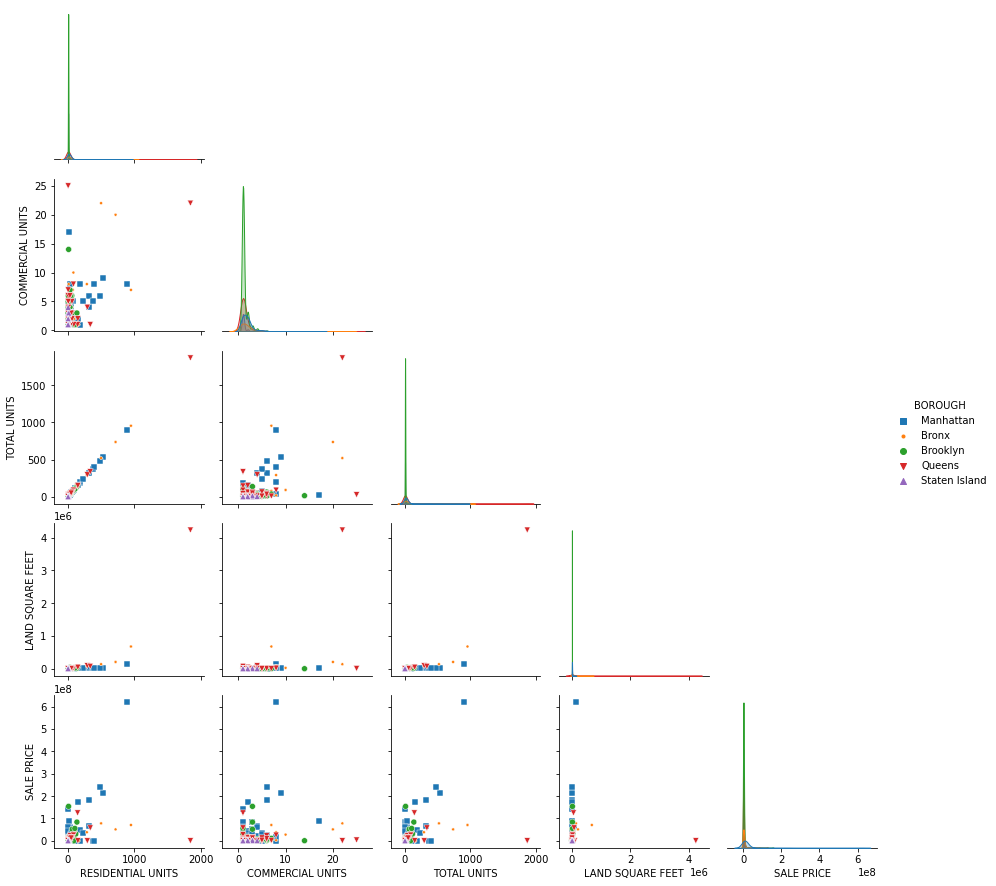

In [28]:
# Write your function below
df = df[~(df == 0).any(axis=1)]
(df == 0).astype(int).sum(axis=0)
# Graded-Funtion Begin

g = sns.pairplot(df, vars=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS',
                           'LAND SQUARE FEET','SALE PRICE'], hue='BOROUGH', 
                 markers = [',', '.', 'o', 'v', '^'], corner='True')


# Graded-Funtion End

In [29]:
df1=df.groupby("BOROUGH")
bronx = df1.get_group('Bronx')

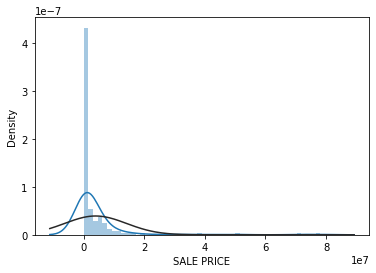

In [30]:
from scipy.stats import norm
x = pd.Series(bronx['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [31]:
df2=df.groupby("BOROUGH").agg({"TOTAL UNITS": [np.mean, np.std, np.size]})
df2

TOTAL UNITS                 
                     mean         std size
BOROUGH                                   
Bronx           29.515924  106.603363  157
Brooklyn         5.588235   10.716097  663
Manhattan       33.167331   86.222108  251
Queens          12.914530  102.939364  351
Staten Island    3.250000    2.525206   76

In [32]:
mean_tot = df2.iloc [2,0]    #mean Manhattan
sd = df2.iloc [2,1]          #standard deviation for Manhattan
n = df2.iloc [2,2]           #Total number of Manhattan
z = 1.96          #z-score from the z table mentioned before 95% CL

In [33]:
se = sd / np.sqrt(n)
se

5.442291192145497

In [34]:
lcb = mean_tot - z* se  #lower limit of the CI
ucb = mean_tot + z* se  #upper limit of the CI
print("That means the true mean of the Total Units (properties) of the Manhattan District will fall between {:0.2f} and {:0.2f}".format(lcb, ucb))

That means the true mean of the Total Units (properties) of the Manhattan District will fall between 22.50 and 43.83


Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [35]:
display(bronx['SALE PRICE'].mean())
display(df['SALE PRICE'].mean())

3964783.866242038

4853852.725634179

In [36]:
stats.ttest_1samp(a = bronx['SALE PRICE'],               # Sample data
                 popmean = df['SALE PRICE'].mean())  # Pop mean

Ttest_1sampResult(statistic=-1.0924524864889105, pvalue=0.27631848217579624)

In [37]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [38]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

In [39]:
stats.t.cdf(x= -1.0924524864889105,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test *

0.27997644367307795

Perhatikan bahwa nilai ini sama dengan nilai p yang tercantum dalam keluaran uji-t asli. Nilai pvalue=0.2763 berarti kami berharap untuk melihat data ekstrim seperti sampel kami karena kebetulan 27% dari waktu jika hipotesis nol benar. 

In [40]:
sigma = bronx['SALE PRICE'].std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = bronx['SALE PRICE'].mean(), # Sample mean
                 scale= sigma)                # Standard dev estimat

(1066760.1491229115, 6862807.583361165)

In [41]:
stats.t.interval(0.99,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = bronx['SALE PRICE'].mean(), # Sample mean
                 scale= sigma)                # Standard dev estimat

(100004.75917937607, 7829562.9733047)

Write your final conclusion below.

Your conclusion below are graded. (1 Points)

Dalam hal ini, nilai p lebih tinggi dari tingkat signifikansi kita α (sama dengan 1-conf.level atau 0,05) jadi kita harus menerima hipotesis nol.